# Neuropsychology: Working with Scientific Data

This lesson is based on:
* https://github.com/btel/python-in-neuroscience-tutorials
* https://github.com/voytekresearch/tutorials

![](figs/L10/sphx_glr_mri_with_eeg_001.png)
Made with Python: https://matplotlib.org/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py

# What does EEG data usually look like?

EEG data is usually a matrix, which is a [table of numbers](https://www.mathsisfun.com/algebra/matrix-introduction.html). 
For example, this is a very small matrix (called an array in Python):

$\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6 \\ 7 & 8 & 9\end{bmatrix}$


# How do we work with matrices in Python? [Numpy](https://www.numpy.org/devdocs/user/quickstart.html)

In [1]:
import matplotlib.cbook as cbook # matplotlib - data visualization library
import numpy as np # numpy - matrix math library

In [Lecture 05: Files & Strings](L05_files_strings.ipynb), we manually parsed (tore apart) the file to get out the data. In this case, because the eeg data is a .dat file, we can use the [numpy](https://www.numpy.org/devdocs/user/quickstart.html) to open and parse it. Here we load the data from the plot seen above. 

We know before hand that we have 4 electrods [PG3, PG5 PG7, PG9] and 800 samples per electrodes. We use this information to put the numbers in the file into the table correctly.

In [4]:
# Load the EEG data (this is the sample data used in the plot above)
n_samples, n_rows = 800, 4
with cbook.get_sample_data('eeg.dat') as eegfile:
    # fromfile gets a list of numbers, reshape puts it into [800 by 4 form]
    data = np.fromfile(eegfile, dtype=float).reshape((n_samples, n_rows))

In [5]:
# How big is data? Use the .shape attribute of a numpy array
data.shape

(800, 4)

In [6]:
# What does the data look like? 
data

array([[ 4.00935742e-02,  4.33323758e-02,  8.45037517e-02,
         3.69994439e-02],
       [ 1.49100500e-02, -6.45506183e-02,  1.18526509e-01,
        -1.06231530e-01],
       [-8.90015452e-02, -7.76399990e-01,  4.38951501e-01,
        -1.28812635e+00],
       ...,
       [ 4.95619291e-04,  2.46950289e-01,  1.45181872e+00,
         6.18618189e-01],
       [ 3.64703844e-02, -6.83670697e-01,  1.20737950e+00,
        -1.91766933e-01],
       [ 2.05381928e-01, -5.79883336e-01,  1.04153433e+00,
         2.63671749e-01]])

# How do we get measurements out? Indexing

Like in [lecture 06: Data Exploration](L06_stats.ipynb), numpy uses the row/column convention.
 ![image of axis, where rows=axis 0, columns = axis 1](figs/L06/axis.jpg)
[stackoverflow](https://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition)

[Indexing on an array](http://www.pythoninformer.com/python-libraries/numpy/index-and-slice/) is similar to indexing on [lists](L04_lists_dicts.ipynb). Given:

In [7]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

__repr__ vs str( representation)

In [8]:
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


# Selecting a row:

In [9]:
a[1]


array([4, 5, 6])

# Selecting a column:
The conventions is A[row, column] and : means return all the elements of that dimension. 

In [10]:
a[:,1]

array([2, 5, 8])

# Selecting both:
Rows and columns can be subset at the same time:

In [11]:
a[:2,:2]

array([[1, 2],
       [4, 5]])

In [12]:
# Also valid
a[0:2, 0:2]

array([[1, 2],
       [4, 5]])

In [13]:
# [start, stop) 
# inclusive on start
# exclusive on stop
a[1:, 1:]

array([[5, 6],
       [8, 9]])

# Pair up & practice: 
data is the `data` variable that we loaded using:
```python
n_samples, n_rows = 800, 4
with cbook.get_sample_data('eeg.dat') as eegfile:
    # fromfile gets a list of numbers, reshape puts it into [800 by 4 form]
    data = np.fromfile(eegfile, dtype=float).reshape((n_samples, n_rows))
    ```

1. Extract the samples for the 2nd electrode in the data
2. Extract the 500th sample for all the electrodes
3. Extract the first 100 samples of the 2nd and 3rd electrodes


In [14]:
data.shape

(800, 4)

In [15]:
print(data[:, 1].shape)
print(data[501, :])
print(data[:100, 1:3].shape)

(800,)
[-1.3424556   0.00905544  0.41674308 -0.99303523]
(100, 2)


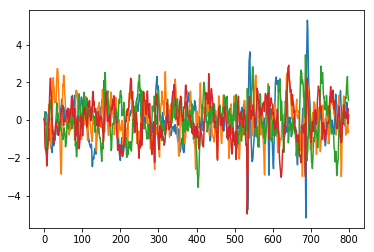

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
_ = ax.plot(data)

How can we make them not crowded? Let's 
1. Associate each row with it's electrode
2. Create an axes for electrode 
3. Make the figures [share axis](L07_stats_viz.ipynb) so that the Xs and Ys line up


In [17]:
# use zip to pair electrodes with labels:
list(zip(['PG3', 'PG5', 'PG7', 'PG9'], data))

[('PG3', array([0.04009357, 0.04333238, 0.08450375, 0.03699944])),
 ('PG5', array([ 0.01491005, -0.06455062,  0.11852651, -0.10623153])),
 ('PG7', array([-0.08900155, -0.77639999,  0.4389515 , -1.28812635])),
 ('PG9', array([ 0.29211118, -0.63496618,  0.15711718, -1.5025045 ]))]

# Is that correct? 

zip is pairing up the labels with the rows, which here are the samples 
flip rows and columns using .T - transpose

# What is transpose?

In [18]:
a.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [33]:
list(zip(['PG3', 'PG5', 'PG7', 'PG9'], data.T))

[('PG3',
  array([ 4.00935742e-02,  1.49100500e-02, -8.90015452e-02,  2.92111182e-01,
          3.16474039e-01,  4.26129536e-01,  3.40620436e-01,  3.12020629e-01,
         -1.31598979e-01, -2.28880367e-01, -3.63685792e-01, -6.39203276e-01,
         -4.39779542e-01, -6.24182688e-01, -9.76600522e-01, -1.07894740e+00,
         -1.07734011e+00, -1.32068336e+00, -1.44332190e+00, -1.53096100e+00,
         -1.47878752e+00, -1.72406662e+00, -1.23060130e+00, -8.94604487e-01,
         -1.04752150e+00, -1.36311546e+00, -1.06512128e+00, -8.37408474e-01,
         -6.97168342e-01, -7.41498064e-01, -7.74424530e-01, -4.65613040e-01,
         -3.83062936e-01,  5.24226984e-02, -1.10254604e-01,  4.57533290e-02,
          3.33401644e-02,  2.37538801e-01, -1.78635656e-01, -4.67218070e-01,
         -2.63669942e-02, -8.05778822e-02,  1.87685408e-01,  4.82079901e-01,
          6.91436454e-01,  7.76342567e-01,  1.08847104e+00,  1.09187743e+00,
          8.80606907e-01,  6.06533162e-01,  4.46190137e-01,  6.8096

In [50]:
# What does zip do?
list(zip(["sh105","nac107"] ,["Psych3117", "CSC212"]))

[('sh105', 'Psych3117'), ('nac107', 'CSC212')]

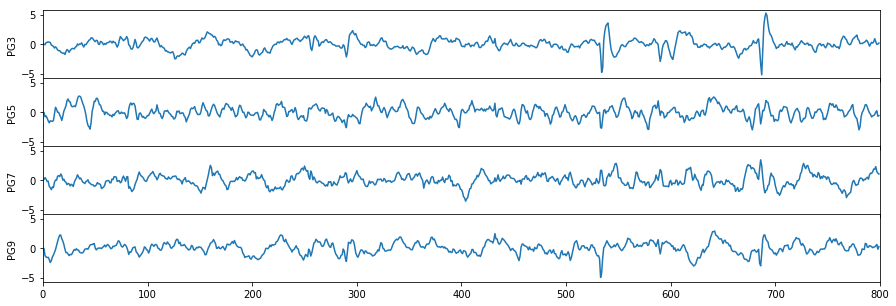

In [48]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(15,5))
for ax, label, electrode in zip(axes, ['PG3', 'PG5', 'PG7', 'PG9'], data.T):
    _ = ax.plot(electrode)
    _ = ax.set_ylabel(label)
ax.set_xlim(0,800) # set the starting and ending points of the graph
plt.subplots_adjust(hspace=0)# no space between graphs

# That's some spikey data! Can we process it for less spikiness?

Let's convert our data into a Pandas data frame because Pandas provides a lot of functions natively:


In [4]:
import pandas as pd
df = pd.DataFrame(data, columns=['PG3', 'PG5', 'PG7', 'PG9'])

In [56]:
df.head()

PG3       PG5       PG7       PG9
0  0.040094  0.043332  0.084504  0.036999
1  0.014910 -0.064551  0.118527 -0.106232
2 -0.089002 -0.776400  0.438952 -1.288126
3  0.292111 -0.634966  0.157117 -1.502505
4  0.316474 -0.988316 -0.214232 -1.599416

In [ ]:
df.head()

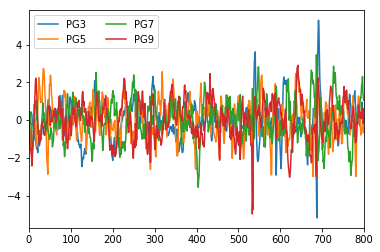

In [63]:
# Let's check that it looks the same as above
fig, ax = plt.subplots()
_ = df.plot(ax=ax)
_ = ax.legend(ncol=2) # modify the legend

Lots of tangle! How do we get out 'PG3'?

In [64]:
df['PG3'].head()

0    0.040094
1    0.014910
2   -0.089002
3    0.292111
4    0.316474
Name: PG3, dtype: float64

In [5]:
_ = df['PG3'].plot()

# How do we smooth this signal? - rolling average!

The EEG data is defined such that for every time (t) there's a measurement of the voltage of the electrical signal passing through the brain.

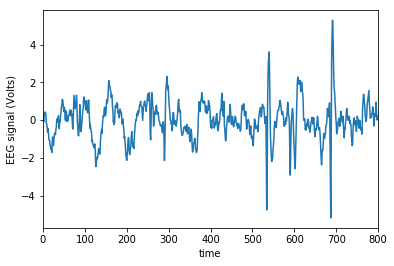

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
_ = df['PG3'].plot(ax=ax)
_ = ax.set_xlabel("time")
_ = ax.set_ylabel("EEG signal (Volts)")

To compute the rolling average:
1. Define a `window_size`, which is the number of observations to include in the average.
2. Set time t=0. Define a window between t=0 and t=window_size (red box in the figure below)
3. Take the average of the voltages in that window and store that as moving_average(t) (black line)
4. Shift t and the moving average by 1, such that the window is between t=1, and t=1+window_size
5. Take the average of the volatages in the new window, and store as moving_average(t+1)
6. Repeat for all values in (t)

In [12]:
N=100
dfsub = df['PG3'][:N] # taking a subset so the animation doesn't explode
window_size = 5
moving_avg = dfsub.rolling(window_size).mean()

In [27]:
%%capture
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(15,5))
dfsub.plot(ax=ax, label='PG3')
line, = ax.plot(0, dfsub[0], linewidth=3, color='k', label="moving average")
ax.set_xticks(np.arange(0,N, window_size))
ax.xaxis.grid(True)
ax.legend(ncol=2)
def animate(i):
    mwindow = ax.axvspan(0, i, color='white')
    mwindow = ax.axvspan(i-window_size, i, color='red', alpha=.25)
    #moving average is centered at middle of window
    line.set_data(moving_avg.index[:i]-window_size/2, moving_avg[:i])
    return [mwindow, line]

In [28]:
from matplotlib import animation
from IPython.display import HTML

ani = animation.FuncAnimation(fig, animate, frames=N)

In [29]:
HTML(ani.to_jshtml())

# Practice:
What happens when you change the step? How does the moving average change?

# Can we apply this to all the data?

In [16]:
df.head()

PG3       PG5       PG7       PG9
0  0.040094  0.043332  0.084504  0.036999
1  0.014910 -0.064551  0.118527 -0.106232
2 -0.089002 -0.776400  0.438952 -1.288126
3  0.292111 -0.634966  0.157117 -1.502505
4  0.316474 -0.988316 -0.214232 -1.599416

In [17]:
mv = df.rolling(window_size).mean()

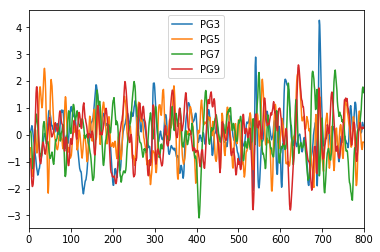

In [18]:
_ = mv.plot()

# Pair up & Practice:
1. Separate out the original signals into their own axes
2. Seperate out the moving averages into their own axes
3. Try different window sizes and see how things change